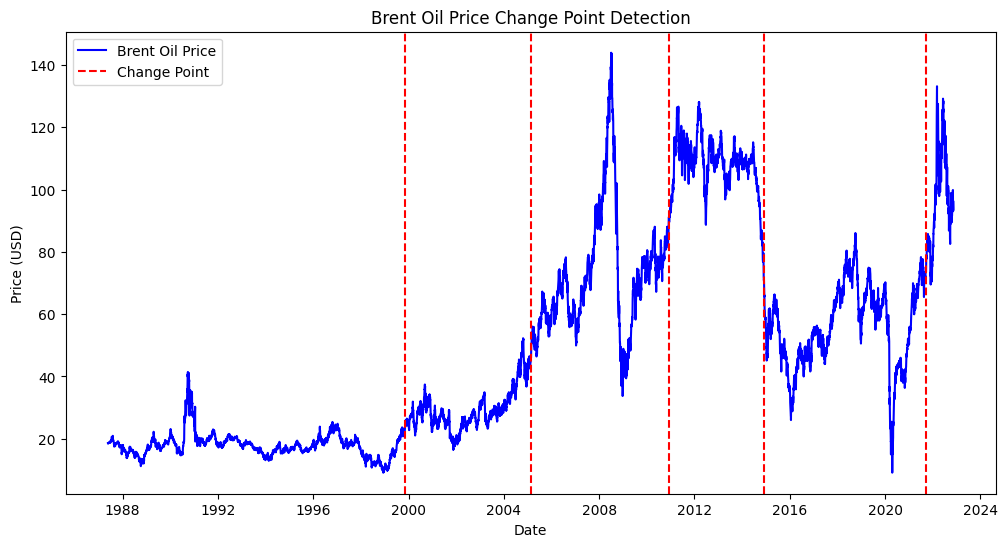

🔹 Detected Change Points (Dates): [Timestamp('1999-11-09 00:00:00'), Timestamp('2005-02-23 00:00:00'), Timestamp('2010-12-14 00:00:00'), Timestamp('2014-12-02 00:00:00'), Timestamp('2021-09-22 00:00:00')]


In [2]:
import pandas as pd
import numpy as np
import ruptures as rpt
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv(r"C:\Users\user\Projects\Brent-Oil-Price-Analysis-for-Birhan-Energies\data\proecessed\cleaned_brent_oil.csv", parse_dates=["Date"])

# Convert Date to index for plotting
df.set_index("Date", inplace=True)

# Convert price to numpy array for ruptures
price_series = df["Price"].values

# Apply Change Point Detection using Binary Segmentation
model = rpt.Binseg(model="l2").fit(price_series)
change_points = model.predict(n_bkps=5)  # Adjust number of breakpoints as needed

# Ensure change points are within the valid range
change_points = [cp for cp in change_points if cp < len(df)]

# Plot the detected change points
plt.figure(figsize=(12,6))
plt.plot(df.index, price_series, label="Brent Oil Price", color="blue")

# Mark change points
for cp in change_points:
    plt.axvline(df.index[cp-1], color="red", linestyle="--", label="Change Point" if cp == change_points[0] else "")

plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Brent Oil Price Change Point Detection")
plt.legend()
plt.show()

# Print detected change points
print("🔹 Detected Change Points (Dates):", df.index[change_points].tolist())